## Getting starting with data analysis in python
Previously, I've only done data analysis in R. Here's my first real try of doing something besides linear regression/GLMs in Python.

The titanic dataset is a dataset of the passengers onboard the ill-fated titanic when it sunk over a century ago. Let's see if we can predict whether or not a passenger would've survived based on the other characteristics we knew about them.

Let's use pandas, import the classic titanic dataset, and print the columns names, and the top 7 rows of the dataset as a sanity check/ quick look of the data we're importing. 

Note that this is the training dataset; we'll be setting aside the testing dataset to see how well our models generalize to new data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

train = pd.DataFrame.from_csv('C:/Users/vlee/PycharmProjects/Jupyter-Notebooks/Kaggle/Titanic/Data/train.csv', index_col = None) 
# Originally, I had issues importing data as the first column was not being recognized
# When you import csv files using pandas, by default the first column of the file is an index column
# index_col=None tells pandas that the first column given is a column with actual data

print("Here is a list of the column names: " + str(train.columns.values))
print("Here are the dimensions of our training dataset in (row, column) form: " + str(train.shape))
train.head(n=7)

Here is a list of the column names: ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
Here are the dimensions of our training dataset in (row, column) form: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


We have a training dataset with 891 rows, and 12 columns: 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
 'Ticket', 'Fare', 'Cabin', 'Embarked'

It looks like some of the columns may be unsuitable for prediction. Let's see what the columns are actually representing. Here's an explanation of the variables taken from Kaggle.


## Data Dictionary
survival	- Survival	0 = No, 1 = Yes

pclass	- Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex	- Sex	

Age	- Age in years	

sibsp -	# of siblings / spouses aboard the Titanic	

parch -	# of parents / children aboard the Titanic	

ticket -	Ticket number	

fare -	Passenger fare	

cabin -	Cabin number	

embarked -	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.


## Sanity check of variables

Some variables that should stand out are the "Name", "Ticket" and "PassengerId" columns. By intuition, the name should not be a significant determinant in whether or not someone died in a ship sinking. The same goes for the passenger id, which is just an index variable assigned to the dataset well after the event. 

In a similar fashion, the ticket number shouldn't really matter either. From pulling the first 7 ticket numbers from the data set, we see that ticket numbers have no clear meaning, as some of the ticket numbers have characters included, and the numbers range from 17463 to 373450, which means that the ticket number does not match the number of passengers either, or boarding order, as the titanic certainly did not have room for 300,000 people.

## Data Janitor Work

Since we've identified the Name and Ticket columns are not being particularly useful in predicting whether or not a given titanic passenger would've survived, let's drop those first. 

In [2]:
train.drop(['PassengerId','Name','Ticket'], axis = 1, inplace = True)
train.head(n=7)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
5,0,3,male,NaN,0,0,8.4583,NaN,Q
6,0,1,male,54.0,0,0,51.8625,E46,S


         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


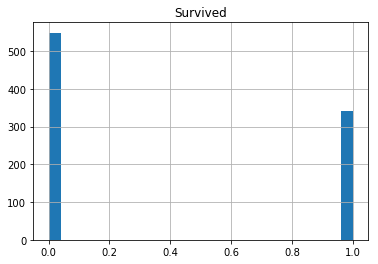

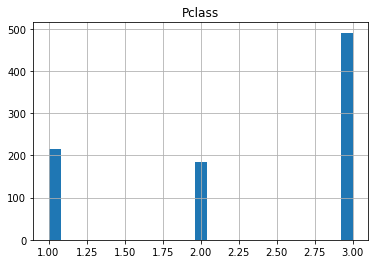

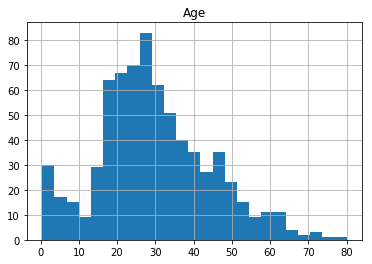

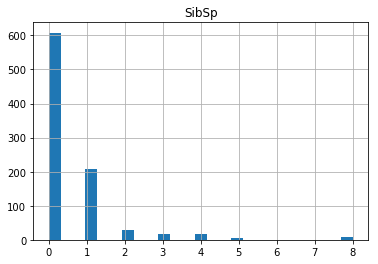

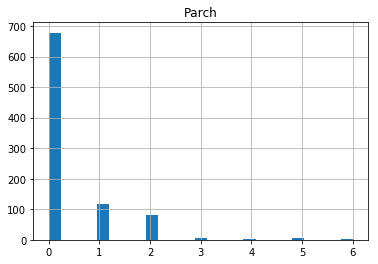

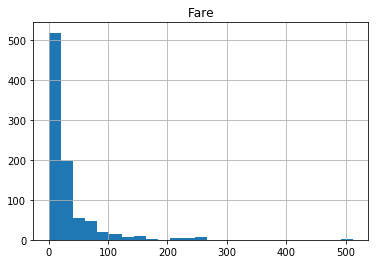

In [3]:
print(train.describe())

for column_name in train.columns.values:
    try:
        histo = train.hist(column = column_name, bins = 25)
        plt.show()
    except:
        pass

Looks better. Looks like we might have some missing data (PassengerID 7 has a missing age value, and the Cabin column has many missing values). Let's see if we have any missing data values elsewhere.

In [4]:
train.isnull().sum()
# age = train['Age'].tolist()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Looks like we have some missing data. The Age, Cabin, and Embarked columns have some missing values. We will need to deal with this. 

A lot of records are missing cabin numbers. Cabin numbers seem to be formatted with a combination of a letter at the beginning, followed by a number. While the letter at the beginning may indicate what section of the ship the passenger was in, "pclass" would be an excellent proxy, as what class your ticket was determined what section of the ship you were placed in, and it has no missing values. 

Let's remove the "Cabin" column.

The age and the embarked columns are a little more problematic. 

We can remove the data entries/ passengers who have missing embarkation data, as there are only two passengers who are missing embarkation data. However, with regards to age, we could drop the age column, but that leaves the issue of us dropping a lot of data - age certainly was a factor in one's survival on the titanic - "women and children first". 

We could just exlude the passenger entries with missing age values, but we don't know how many passengers in the testing data set lack ages. What will happen if our model, if trained with age as an input, needs to guess whether or not a passenger whose age is unknown survived? 

For now, let's just exclude the passengers with missing age values from our training dataset. 

In [5]:
train.drop(['Cabin'], axis = 1, inplace = True)
train.dropna(subset = ["Age","Embarked"], inplace = True)
print(train.isnull().sum())
print("Here are the dimensions of our training dataset in (row, column) form: " + str(train.shape))
train.head(n=7)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Here are the dimensions of our training dataset in (row, column) form: (712, 8)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S


Much better. Worth nothing however, is the fact that our training now only has 712 observations, compared to the original 891, a 20% reduction.

In [6]:
train = pd.get_dummies(data = train, columns = ['Pclass', 'Sex', 'Embarked'])
train.head(n = 7)

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1
6,0,54.0,0,0,51.8625,1,0,0,0,1,0,0,1
7,0,2.0,3,1,21.0750,0,0,1,0,1,0,0,1


In [7]:
train.describe()
train.drop(['Pclass_3', 'Sex_male', 'Embarked_S'], axis = 1, inplace = True)
train.head(n = 7)

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Sex_female,Embarked_C,Embarked_Q
0,0,22.0,1,0,7.2500,0,0,0,0,0
1,1,38.0,1,0,71.2833,1,0,1,1,0
2,1,26.0,0,0,7.9250,0,0,1,0,0
3,1,35.0,1,0,53.1000,1,0,1,0,0
4,0,35.0,0,0,8.0500,0,0,0,0,0
6,0,54.0,0,0,51.8625,1,0,0,0,0
7,0,2.0,3,1,21.0750,0,0,0,0,0


In [8]:
import statsmodels.api as sm
train_cols =  train.columns[1:]
logit = sm.Logit(train['Survived'], train[train_cols])
result = logit.fit()
print(result.summary())

C:\Users\vlee\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.452866
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      703
Method:                           MLE   Df Model:                            8
Date:                Mon, 18 Dec 2017   Pseudo R-squ.:                  0.3289
Time:                        14:48:41   Log-Likelihood:                -322.44
converged:                       True   LL-Null:                       -480.45
                                        LLR p-value:                 1.595e-63
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0661      0.006    -11.569      0.000      -0.077      -0.055
SibSp         -0.5178      0.

In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix
from IPython.display import display
train['Probability'] = result.predict(train[train_cols])
train['Predicted'] = np.where(train['Probability'] >= 0.5, 1 ,0)
train.head(n = 7)
# confusion_matrix(train['Survived'], train['Predicted'])

train_cmatrix = pd.crosstab(np.where(train['Survived'] == 1, 'Survived', 'Died'), 
                            np.where(train['Predicted'] == 1, 'Survived', 'Died'),
                            rownames=['Actual'],
                            colnames=['Predicted'],
                            margins=True)
display(train_cmatrix)

Predicted,Died,Survived,All
Actual,,,
Died,361,63,424
Survived,74,214,288
All,435,277,712


In [10]:
train_tp = train_cmatrix['Survived']['Survived']
train_fp = train_cmatrix['Survived']['Died']
train_fn = train_cmatrix['Died']['Survived']
train_precision = train_tp/(train_tp + train_fp)
train_recall = train_tp/(train_tp + train_fn)
train_f1 = 2/(train_precision**-1 + train_recall**-1)
print("The F1 Score of the model on the training dataset is " + str(train_f1))

The F1 Score of the model on the training dataset is 0.757522123894


In [11]:
survival = pd.DataFrame.from_csv('C:/Users/vlee/PycharmProjects/Jupyter-Notebooks/Kaggle/Titanic/Data/gender_submission.csv', index_col = None)
test = pd.DataFrame.from_csv('C:/Users/vlee/PycharmProjects/Jupyter-Notebooks/Kaggle/Titanic/Data/test.csv', index_col = None)
print("Here are the dimensions of our training dataset, before removing rows with missing data, in (row, column) form: " + str(test.shape))
test.drop(['Name','Ticket','Cabin'], axis = 1, inplace = True)
test = pd.get_dummies(data = test, columns = ['Pclass', 'Sex', 'Embarked'])
test = survival.merge(test, on = 'PassengerId')
test.dropna(subset = ['Age'], inplace = True)
test.drop(['PassengerId', 'Pclass_3', 'Sex_male', 'Embarked_S'], axis = 1, inplace = True)
test_cols = test.columns[1:]
test['Probability'] =  result.predict(test[test_cols])
test['Predicted'] = np.where(test['Probability'] >= 0.5, 1, 0)
print("Here are the dimensions of our training dataset, after removing rows with missing data, in (row, column) form: " + str(test.shape))
test.head(n = 7)



Here are the dimensions of our training dataset, before removing rows with missing data, in (row, column) form: (418, 11)
Here are the dimensions of our training dataset, after removing rows with missing data, in (row, column) form: (332, 12)


,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Sex_female,Embarked_C,Embarked_Q,Probability,Predicted
0,0,34.5,0,0,7.8292,0,0,0,0,1,0.048680,0
1,1,47.0,1,0,7.0000,0,0,1,0,0,0.253208,0
2,0,62.0,0,0,9.6875,0,1,0,0,1,0.022485,0
3,0,27.0,0,0,8.6625,0,0,0,0,0,0.144568,0
4,1,22.0,1,1,12.2875,0,0,1,0,0,0.615876,1
5,0,14.0,0,0,9.2250,0,0,0,0,0,0.285355,0
6,1,30.0,0,0,7.6292,0,0,1,0,1,0.465603,0


In [12]:
test_cmatrix = pd.crosstab(np.where(test['Survived'] == 1, 'Survived', 'Died'), 
                            np.where(test['Predicted'] == 1, 'Survived', 'Died'),
                            rownames=['Actual'],
                            colnames=['Predicted'],
                            margins=True)
display(test_cmatrix)
test_tp = test_cmatrix['Survived']['Survived']
test_fp = test_cmatrix['Survived']['Died']
test_fn = test_cmatrix['Died']['Survived']
test_precision = test_tp/(test_tp + test_fp)
test_recall = test_tp/(test_tp + test_fn)
test_f1 = 2/(test_precision**-1 + test_recall**-1)
print("The F1 Score of the model on the test dataset is " + str(test_f1))

Predicted,Died,Survived,All
Actual,,,
Died,184,21,205
Survived,14,113,127
All,198,134,332


The F1 Score of the model on the test dataset is 0.865900383142
